<a href="https://colab.research.google.com/github/MINJIN82/-Ubion/blob/main/mini_project25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###diet 파일

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,961 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128285 files and di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='NanumbarunGothic')

In [ ]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/mini/online_diet_1.xlsx")

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
df.head()

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,bmi,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,NaN,NaN
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,NaN,NaN
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,NaN,NaN
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,NaN,NaN
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,NaN,...,21.0,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,NaN,NaN


In [ ]:
df.isnull().sum()
df_z =df.fillna(0)
df_z.isnull().sum()

seq_num            0
id                 0
social_id1         0
zip_code           0
occupation         0
sex                0
height             0
weight             0
married            0
dise               0
want_diet          0
goal               0
created            0
waist              0
heap               0
loss_part          0
loss_part_count    0
diet_purpose       0
diet               0
bmi                0
order_id           0
pfid               0
p_name             0
p_price            0
p_created          0
p_quantity         0
1P_price           0
Unnamed: 27        0
Unnamed: 28        0
dtype: int64

In [ ]:
df=df_z
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seq_num          4511 non-null   float64
 1   id               4511 non-null   object 
 2   social_id1       4511 non-null   float64
 3   zip_code         4511 non-null   object 
 4   occupation       4511 non-null   float64
 5   sex              4511 non-null   float64
 6   height           4511 non-null   float64
 7   weight           4511 non-null   float64
 8   married          4511 non-null   float64
 9   dise             4511 non-null   object 
 10  want_diet        4511 non-null   float64
 11  goal             4511 non-null   float64
 12  created          4511 non-null   object 
 13  waist            4511 non-null   object 
 14  heap             4511 non-null   object 
 15  loss_part        4511 non-null   object 
 16  loss_part_count  4511 non-null   float64
 17  diet_purpose  

In [ ]:
df

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,bmi,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4507,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4508,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4509,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0


<Axes: >

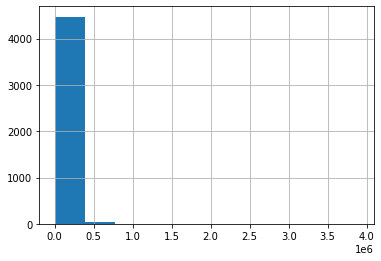

In [ ]:
df['p_price'].hist()

BP(ax=<Axes: >, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7f3f87095310>, <matplotlib.lines.Line2D object at 0x7f3f870955b0>], 'caps': [<matplotlib.lines.Line2D object at 0x7f3f87095850>, <matplotlib.lines.Line2D object at 0x7f3f87095af0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7f3f87095070>], 'medians': [<matplotlib.lines.Line2D object at 0x7f3f87095d90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7f3f87022070>], 'means': []})

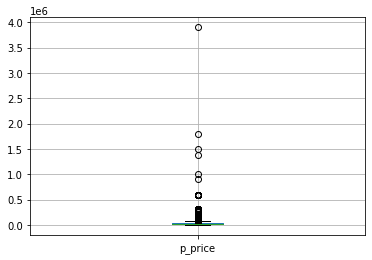

In [ ]:
from ast import Return
df.boxplot(column='p_price', return_type='both')


In [ ]:
q1 = df["p_price"].quantile(q=0.25) #1분위수
q3 = df["p_price"].quantile(q=0.75) #3분위수
IQR =q3-q1
IQR

24000.0

In [ ]:
data_IQR =df[(df["p_price"] < q3 + IQR*1.5) & (df["p_price"]>q1-IQR *1.5)]
data_IQR

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,bmi,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,21.0,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4507,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4508,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0
4509,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0


In [ ]:
df=data_IQR

In [ ]:
id_v=df["p_price"].value_counts()
id_v

12900.0    612
19500.0    549
29900.0    286
18000.0    240
22000.0    201
          ... 
38700.0      1
39600.0      1
34000.0      1
59400.0      1
59700.0      1
Name: p_price, Length: 79, dtype: int64

In [ ]:
df['bmi_g']=df['bmi'].apply(lambda x: 
                                1 if x < 18.5 
                                else 2 if x < 23 
                                else 3 if x < 25 
                                else 4 if x < 30 
                                else 5)
df

<ipython-input-16-b4a2bda96788>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_g']=df['bmi'].apply(lambda x:


,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0,2
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0,2
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0,2
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0,2
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4507,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4508,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4509,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1


###'저체중': 1,
'정상': 2,
'과체중': 3,
'비만': 4,
'고도비만': 5

In [ ]:
df['bmi_g'].value_counts()

2    2286
3     653
1     519
4     475
5      92
Name: bmi_g, dtype: int64

In [ ]:
e   = df.sort_values(["weight"],ascending=False)
e

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g
2059,2662.0,nowpap,750314.0,305-343,12.0,2.0,159.0,505.5,0.0,4,...,22907.0,MDGLIKE006,매직마스크(★10만고객돌파기념☆),12900.0,2001-07-24 오전 10:05:01,1.0,12900.0,0.0,0,2
652,4092.0,ytm1004,731002.0,403-014,3.0,1.0,180.0,180.0,0.0,"1, 2",...,28980.0,MDEPART009,GDS-미니스텝퍼,39900.0,2001-08-22 오전 1:01:45,1.0,39900.0,0.0,0,5
4054,1571.0,yeppi0242,781104.0,602-062,3.0,2.0,155.0,167.0,0.0,"1, 2",...,24191.0,MDEETCC030,파워세라믹 종아리다이어트(1년 감사세일),19500.0,2001-08-03 오전 10:49:39,1.0,19500.0,0.0,0,5
713,3696.0,nysms,710102.0,480-090,14.0,2.0,159.0,164.0,1.0,0,...,23206.0,MDGFASH004,다이어트 반바지,20000.0,2001-08-18 오전 10:42:58,1.0,20000.0,0.0,0,5
677,4118.0,kimmh9632,660914.0,340-806,1.0,2.0,163.0,162.0,1.0,1,...,29091.0,MDGLIKE006,매직마스크(★10만고객돌파기념☆),14900.0,2001-08-22 오후 2:02:01,1.0,14900.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4478,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4479,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4480,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1


In [ ]:
g = e[e["weight"]>= 150].index
g

Int64Index([2059, 652, 4054, 713, 677, 1811, 978], dtype='int64')

In [ ]:
df.drop(g,inplace=True)

<ipython-input-20-3256cb97788e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(g,inplace=True)


In [ ]:
g = e[e["weight"]== 0].index
g

Int64Index([4492, 4489, 4494, 4491, 4490, 4493, 1175, 4488, 4487, 4496, 4486,
            4485, 4495, 4502, 4497, 4498, 4499, 4500, 4501, 4483, 4503, 4504,
            4505, 4506, 4507, 4508, 4509, 4484, 4477, 4482, 4467,  878, 2625,
            4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4468, 4481,
            4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4478, 4479, 4480,
            4510],
           dtype='int64')

In [ ]:
df.drop(g,inplace=True)

<ipython-input-22-3256cb97788e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(g,inplace=True)


In [ ]:
df

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0,2
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0,2
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0,2
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0,2
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2008.0,witch4820,800206.0,139-201,17.0,2.0,160.0,45.0,0.0,1,...,21639.0,MDEHRWE008,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 3:00:42,1.0,29900.0,0.0,0,1
4452,2010.0,aram622,760622.0,122-945,12.0,2.0,165.0,60.0,0.0,2,...,21647.0,PDFFUNC001,내추럴하우스 라인-업,60000.0,2001-07-05 오후 4:58:43,1.0,60000.0,0.0,0,2
4453,2011.0,0162655575,830219.0,135-080,15.0,2.0,165.0,49.0,0.0,0,...,21654.0,MDEHRWE008,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 7:17:10,1.0,29900.0,0.0,0,1
4455,2013.0,onlyonelhm,880330.0,327-030,15.0,2.0,159.0,58.0,0.0,0,...,21664.0,MDEHRWE008,파워세라믹종아리 다이어트,29900.0,2001-07-06 오전 1:17:45,1.0,29900.0,0.0,0,2


In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g'],
      dtype='object')

In [ ]:
df['bmi_g'].value_counts()

2    2285
3     653
4     475
1     463
5      86
Name: bmi_g, dtype: int64

In [ ]:
df['diet_purpose'].value_counts()

1.0    2099
3.0     856
5.0     354
2.0     270
0.0     239
4.0     144
Name: diet_purpose, dtype: int64

In [ ]:
a= df.groupby(by=['bmi_g'],as_index=False)["diet_purpose"].mean()
a

,bmi_g,diet_purpose
0,1,1.693305
1,2,1.840700
2,3,2.004594
3,4,2.212632
4,5,2.360465


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


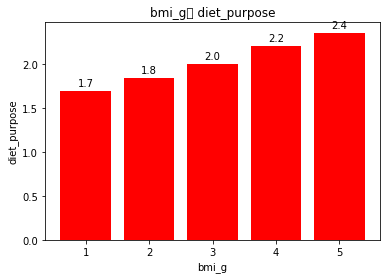

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = a['bmi_g']
mean_sales = a["diet_purpose"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('diet_purpose')
ax.set_xlabel('bmi_g')
ax.set_title('bmi_g별 diet_purpose')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

###'저체중': 1,
'정상': 2,
'과체중': 3,
'비만': 4,
'고도비만': 5


In [ ]:
b=df.groupby(by=['bmi_g'],as_index=False)["p_price"].mean()
b

,bmi_g,p_price
0,1,24045.788337
1,2,24682.778993
2,3,26550.076570
3,4,27040.000000
4,5,26184.883721


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


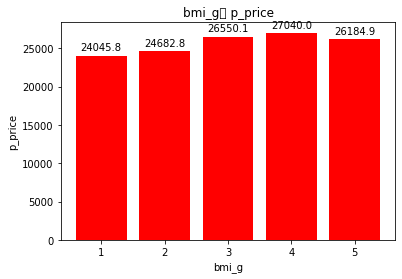

In [ ]:
# 데이터
labels = b['bmi_g']
mean_sales = b["p_price"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('p_price')
ax.set_xlabel('bmi_g')
ax.set_title('bmi_g별 p_price')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
c= df.groupby(by=['diet_purpose'],as_index=False)["p_price"].mean()
c

,diet_purpose,p_price
0,0.0,24368.200837
1,1.0,24567.579800
2,2.0,26414.444444
3,3.0,26332.651869
4,4.0,27502.430556
5,5.0,25260.169492


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


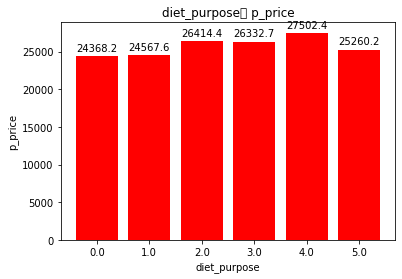

In [ ]:
# 데이터
labels = c['diet_purpose']
mean_sales = c["p_price"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('p_price')
ax.set_xlabel('diet_purpose')
ax.set_title('diet_purpose별 p_price')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
d=df.groupby(by=['loss_part_count'],as_index=False)["p_price"].mean()
d

,loss_part_count,p_price
0,1.0,24637.661406
1,2.0,24739.912281
2,3.0,24987.921022
3,4.0,26073.387097
4,5.0,25859.170854
5,6.0,24300.000000
6,7.0,27134.899329
7,8.0,26535.185185
8,9.0,25045.859873


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


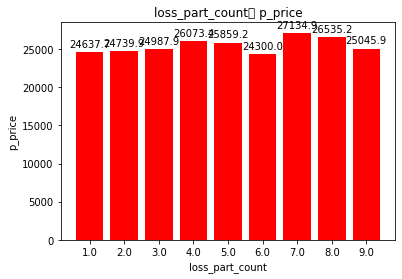

In [ ]:
# 데이터
labels = d['loss_part_count']
mean_sales = d["p_price"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('p_price')
ax.set_xlabel('loss_part_count')
ax.set_title('loss_part_count별 p_price')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
df['social_id1'] = df['social_id1'].astype(str) # 시리즈의 데이터 타입을 문자열로 변환
df['birth_year'] = df['social_id1'].str[:2]

<ipython-input-35-a52044d3ae35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['social_id1'] = df['social_id1'].astype(str) # 시리즈의 데이터 타입을 문자열로 변환
<ipython-input-35-a52044d3ae35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = df['social_id1'].str[:2]


In [ ]:
df['birth_year'] = '19' + df['social_id1'].str.extract('(\d{2})') # 2자리 숫자 추출
this_year = 2023
df['age_group'] = (this_year - df['birth_year'].fillna(0).astype(int)) // 10 * 10 # 결측치를 0으로 대체한 후 정수형으로 변환 후 계산

<ipython-input-36-de904f832f6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'] = '19' + df['social_id1'].str.extract('(\d{2})') # 2자리 숫자 추출
<ipython-input-36-de904f832f6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = (this_year - df['birth_year'].fillna(0).astype(int)) // 10 * 10 # 결측치를 0으로 대체한 후 정수형으로 변환 후 계산


In [ ]:
df

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g,birth_year,age_group
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0,2,1974,40
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0,2,1974,40
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0,2,1974,40
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0,2,1974,40
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0,2,1974,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2008.0,witch4820,800206.0,139-201,17.0,2.0,160.0,45.0,0.0,1,...,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 3:00:42,1.0,29900.0,0.0,0,1,1980,40
4452,2010.0,aram622,760622.0,122-945,12.0,2.0,165.0,60.0,0.0,2,...,내추럴하우스 라인-업,60000.0,2001-07-05 오후 4:58:43,1.0,60000.0,0.0,0,2,1976,40
4453,2011.0,0162655575,830219.0,135-080,15.0,2.0,165.0,49.0,0.0,0,...,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 7:17:10,1.0,29900.0,0.0,0,1,1983,40
4455,2013.0,onlyonelhm,880330.0,327-030,15.0,2.0,159.0,58.0,0.0,0,...,파워세라믹종아리 다이어트,29900.0,2001-07-06 오전 1:17:45,1.0,29900.0,0.0,0,2,1988,30


In [ ]:
e=df.groupby(by=['age_group'],as_index=False)["p_price"].mean()
e

,age_group,p_price
0,30,19013.220339
1,40,24991.742951
2,50,28206.052632
3,60,27026.973684
4,70,22234.782609
5,2020,49000.000000


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


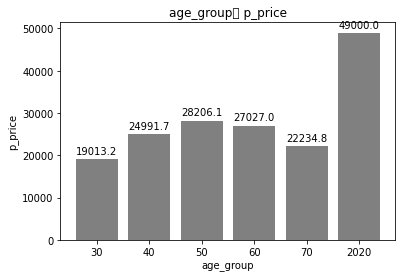

In [ ]:
# 데이터
labels = e['age_group']
mean_sales = e["p_price"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='gray')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('p_price')
ax.set_xlabel('age_group')
ax.set_title('age_group별 p_price')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
g = df[df["age_group"]>= 2020].index
g

Int64Index([2567], dtype='int64')

In [ ]:
df.drop(g,inplace=True)

<ipython-input-41-3256cb97788e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(g,inplace=True)


In [ ]:
f=df['age_group'].value_counts().to_frame()
f

,age_group
40,2731
50,760
30,295
60,152
70,23


In [ ]:
# 데이터 생성
data = {'age_group': [40, 50, 30, 60, 70], 'counts': [3049, 905, 295, 175, 23]}

# 데이터프레임 생성
g= pd.DataFrame(data)
g

,age_group,counts
0,40,3049
1,50,905
2,30,295
3,60,175
4,70,23


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


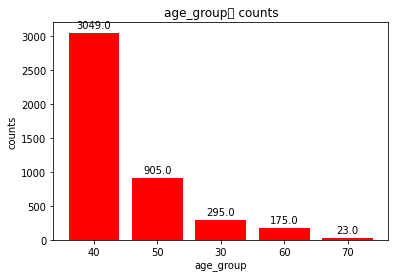

In [ ]:
# 데이터
labels = g['age_group']
mean_sales = g["counts"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('counts')
ax.set_xlabel('age_group')
ax.set_title('age_group별 counts')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g',
       'birth_year', 'age_group'],
      dtype='object')

In [ ]:
i=df.groupby(by=['age_group'],as_index=False)["p_price"].sum()
i

,age_group,p_price
0,30,5608900.0
1,40,68252450.0
2,50,21436600.0
3,60,4108100.0
4,70,511400.0


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


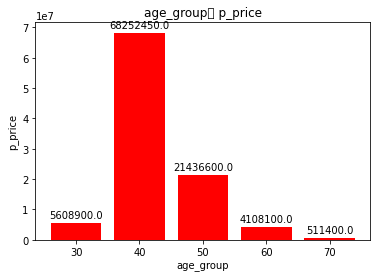

In [ ]:
# 데이터
labels = i['age_group']
mean_sales = i["p_price"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('p_price')
ax.set_xlabel('age_group')
ax.set_title('age_group별 p_price')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
e=df.groupby(by=['age_group'],as_index=False)["p_price"].mean()
e

,age_group,p_price
0,30,19013.220339
1,40,24991.742951
2,50,28206.052632
3,60,27026.973684
4,70,22234.782609


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


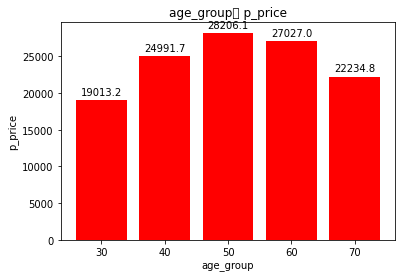

In [ ]:
# 데이터
labels = e['age_group']
mean_sales = e["p_price"]

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('p_price')
ax.set_xlabel('age_group')
ax.set_title('age_group별 p_price')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g',
       'birth_year', 'age_group'],
      dtype='object')

In [ ]:
df.groupby(by=['age_group'],as_index=False)["pfid"].nunique() #nunique()고유한 열값

,age_group,pfid
0,30,36
1,40,111
2,50,90
3,60,33
4,70,15


In [ ]:
df.groupby(by=['age_group'],as_index=False)["bmi_g"].nunique() #nunique()고유한 열값

,age_group,bmi_g
0,30,5
1,40,5
2,50,5
3,60,5
4,70,3


In [ ]:
df_g = df.loc[df['age_group'] == 40, ['bmi_g']].reset_index(drop=True)
df_g.value_counts().to_frame()

,0
bmi_g,
2,1604
3,467
1,343
4,267
5,50


In [ ]:
df_g.columns

Index(['bmi_g'], dtype='object')

In [ ]:
df2 = df.loc[df['age_group'] == 40, ['pfid']].reset_index(drop=True)

In [ ]:
df2

,pfid
0,MDGLIKE001
1,MDGLIKE001
2,MDGLIKE001
3,MDGLIKE001
4,MDGBEAT004
...,...
2726,MDEHRWE008
2727,MDEHRWE008
2728,PDFFUNC001
2729,MDEHRWE008


In [ ]:
df2['pfid'].value_counts()

MDGLIKE006    409
MDEHRWE008    333
MDEPART007    178
MDGFASH004    166
MDEPART001    155
             ... 
MDFFUNC003      1
MDEPART014      1
MDGLIKE011      1
MDEHRWE010      1
MDEETCC015      1
Name: pfid, Length: 111, dtype: int64

In [ ]:
counts_df = df2['pfid'].value_counts().to_frame()
counts_df 

,pfid
MDGLIKE006,409
MDEHRWE008,333
MDEPART007,178
MDGFASH004,166
MDEPART001,155
...,...
MDFFUNC003,1
MDEPART014,1
MDGLIKE011,1
MDEHRWE010,1


In [ ]:
df3 =  df.loc[df['age_group'] == 40, ['loss_part']].reset_index(drop=True)
df3

,loss_part
0,"1, 2"
1,"1, 2"
2,"1, 2"
3,"1, 2"
4,"1, 2"
...,...
2726,4
2727,4
2728,1
2729,"3, 6"


In [ ]:
df3['loss_part'].value_counts()

6                            176
0                            136
1, 2, 3, 4, 5, 6, 7, 8, 9    112
2, 6                          84
1, 6                          84
                            ... 
4, 5, 7                        1
1, 2, 3, 4, 5, 6, 8            1
2, 5, 6, 9                     1
6, 8, 9                        1
1, 5                           1
Name: loss_part, Length: 249, dtype: int64

In [ ]:
loss_part_df = df3['loss_part'].value_counts().to_frame()
loss_part_df 

,loss_part
6,176
0,136
"1, 2, 3, 4, 5, 6, 7, 8, 9",112
"2, 6",84
"1, 6",84
...,...
"4, 5, 7",1
"1, 2, 3, 4, 5, 6, 8",1
"2, 5, 6, 9",1
"6, 8, 9",1


In [ ]:
loss_part_df = df3['loss_part'].value_counts().to_frame()
loss_part_df 

,loss_part
6,176
0,136
"1, 2, 3, 4, 5, 6, 7, 8, 9",112
"2, 6",84
"1, 6",84
...,...
"4, 5, 7",1
"1, 2, 3, 4, 5, 6, 8",1
"2, 5, 6, 9",1
"6, 8, 9",1


In [ ]:
loss_part_df.to_excel('loss_part.xlsx', index=True)

In [ ]:
df4 =  df.loc[df['age_group'] == 40, ['goal']].reset_index(drop=True)
df4

,goal
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2726,3.0
2727,3.0
2728,10.0
2729,2.0


In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g',
       'birth_year', 'age_group'],
      dtype='object')

In [ ]:
df5 =  df.loc[df['age_group'] == 40, ['sex']].reset_index(drop=True)
i=df5['sex'].value_counts().to_frame() 
i


,sex
2.0,2568
1.0,163


In [ ]:
i=df5['married'].value_counts().to_frame() # 40 대 50% 이상이 4 킬로 이상 빼고 싶어 함함
i


,married
0.0,2610
1.0,121


In [ ]:
df4 = df4[df4['goal'] >= 0]

# 실수 값을 정수로 변환
df4['goal'] = df4['goal'].astype(int)

In [ ]:
h=df4['goal'].value_counts().to_frame() # 40 대 50% 이상이 4 킬로 이상 빼고 싶어 함함

new_h = h.loc[h.index <= 10]
new_h

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
labels = new_h.index.astype(str)  # 인덱스 값을 문자열로 변환하여 레이블로 사용
mean_sales = new_h['goal']

# 그래프 그리기
x = np.arange(len(labels))
fig, ax = plt.subplots()
rects = ax.bar(x, mean_sales, align='center', color='red')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('counts')
ax.set_xlabel('goal')
ax.set_title('40대 goal별 counts')

# 레이블 표시
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

In [ ]:
new_h.hist()

In [ ]:
df_price['p_price'].value_counts()

In [ ]:
df.groupby(by=['age_group'],as_index=False)["p_price"].mean()

In [ ]:
df

In [ ]:
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

df["p_price"] = np.log1p(df["p_price"])
sns.distplot(df["p_price"])

In [ ]:
from sklearn import preprocessing
df["p_price"]=preprocessing.scale(df["p_price"])
df["p_price"].describe()


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(df[["p_price"]]))
train_data_minMaxScaled = minMaxScaler.transform(df[["p_price"]])
df["p_price_minmax"]=train_data_minMaxScaled
df["p_price_minmax"].describe()

In [ ]:
df["p_price_minmax"]

In [ ]:
df1 = df[["goal", "loss_part_count", "bmi", "diet", "p_price_minmax"]]
print(df.corr(method='spearman'))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import boxcox

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
num = ['goal', 'bmi','loss_part_count','age_group'] #스케일러 적용
 #카테고리컬(범주형) 

X = df[num]
Y = df['p_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling',StandardScaler(),num)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])


In [ ]:
from sklearn.linear_model import LinearRegression #LinearRegression 선형모델
from sklearn.metrics import mean_squared_error 
from math import sqrt #sqrt 루트

lr = LinearRegression().fit(X_train, Y_train) 

Y_pred = lr.predict(X_test)
print("predict value\n",Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) #트레인 데이터로 나온 R스퀘어
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}". format(rmse))

In [ ]:
#릿지(L2) 모형이 라쏘(L1) 모형보다 예측을 더 잘한다.(오차가 적다)
#다수의 변수, 변수의 계수(베타)를 0에 가깝게 만들어야하는 데이터 셋의 경우 라쏘가 더 낫다. 
#알파가 작아지느냐 알파가 커지느냐에 따라 규제 강도가 달라진다.
#알파가 작으면 선형회귀 모형에 가까워지고, 커질 수록 릿지와 라쏘의 모형에 가까워진다.

from sklearn.linear_model import Ridge

lr_ridge = Ridge(random_state = 0). fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))

In [ ]:
#라쏘
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter =1000). fit(X_train, Y_train) #alpha = 0.01, max_iter =1000) 등 연구자가 정해주는 값이 하이퍼 파라미터이다.
#알파 값에 의해서 규제를 준다.
Y_pred = lr_lasso.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("lasso R2 : {:.3f}". format(lr_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))

In [ ]:
#knn최근접이웃

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors =9, p=2)
#p : int, default =2
#Power parameter for the Minkowski metric. When p=1,
#This is equivalent to using manhattan_distance(l1),and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy :{:.3f}".format(knn_reg.score(X_train, Y_train))) #모형의 Train으로 구한 정확도임(R2과 같음음)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

In [ ]:
#의사결정나무

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state=0,max_depth =5)
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse :{:.3f} ",format(rmse))

In [ ]:
feature_name = X.columns
feature_importance = DT_model_reg.feature_importances_
sorted(zip(feature_importance, feature_name),reverse=True)

In [ ]:
DT_model_reg.feature_importances_

In [ ]:
#인공신경망

#4. 모델링
from sklearn.neural_network import MLPRegressor

#4-1. 모델 생성
nn_reg_model = MLPRegressor(random_state = 0,alpha=0.001, max_iter = 2000, hidden_layer_sizes=[50,50])

#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value :\n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
print("RMSE : {:.3f}". format(rmse))